### import

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (
    AnchoredOffsetbox, AuxTransformBox, DrawingArea, TextArea, VPacker)
import math
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd

import seaborn as sns
import matplotlib.font_manager as fm

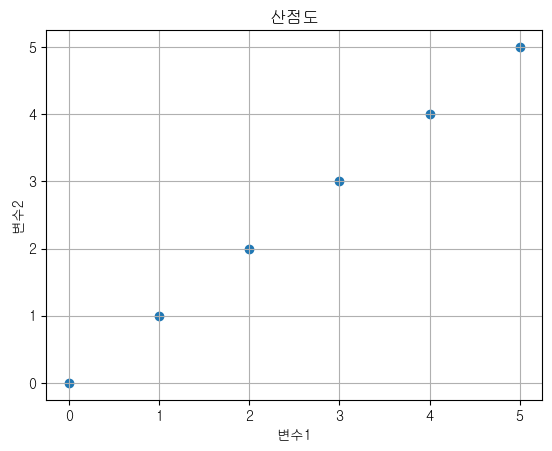

In [2]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
 
plt.scatter([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
plt.title('산점도')
plt.xlabel('변수1')
plt.ylabel('변수2')
plt.grid(True)
plt.show()

font_location = fm.findfont('NanumGothic')
font_name = fm.FontProperties(fname=font_location).get_name()

### csv파일 불러오기

In [121]:
redwine = pd.read_csv('winequality-red.csv', sep = ';', header = 0)
redwine['type'] = 0 # red
whitewine = pd.read_csv('winequality-white.csv', sep = ';', header = 0)
whitewine['type'] = 1 #white

In [132]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [133]:
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


### csv파일 병합

In [122]:
wine = pd.concat([redwine, whitewine], axis=0)
wine.shape

(6497, 13)

In [123]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


# 1. 데이터 탐색

In [114]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [103]:
wine.quality.describe()

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [104]:
wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [10]:
# 결측치 개수 확인
missing_count = wine.isnull().sum()
print(missing_count)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


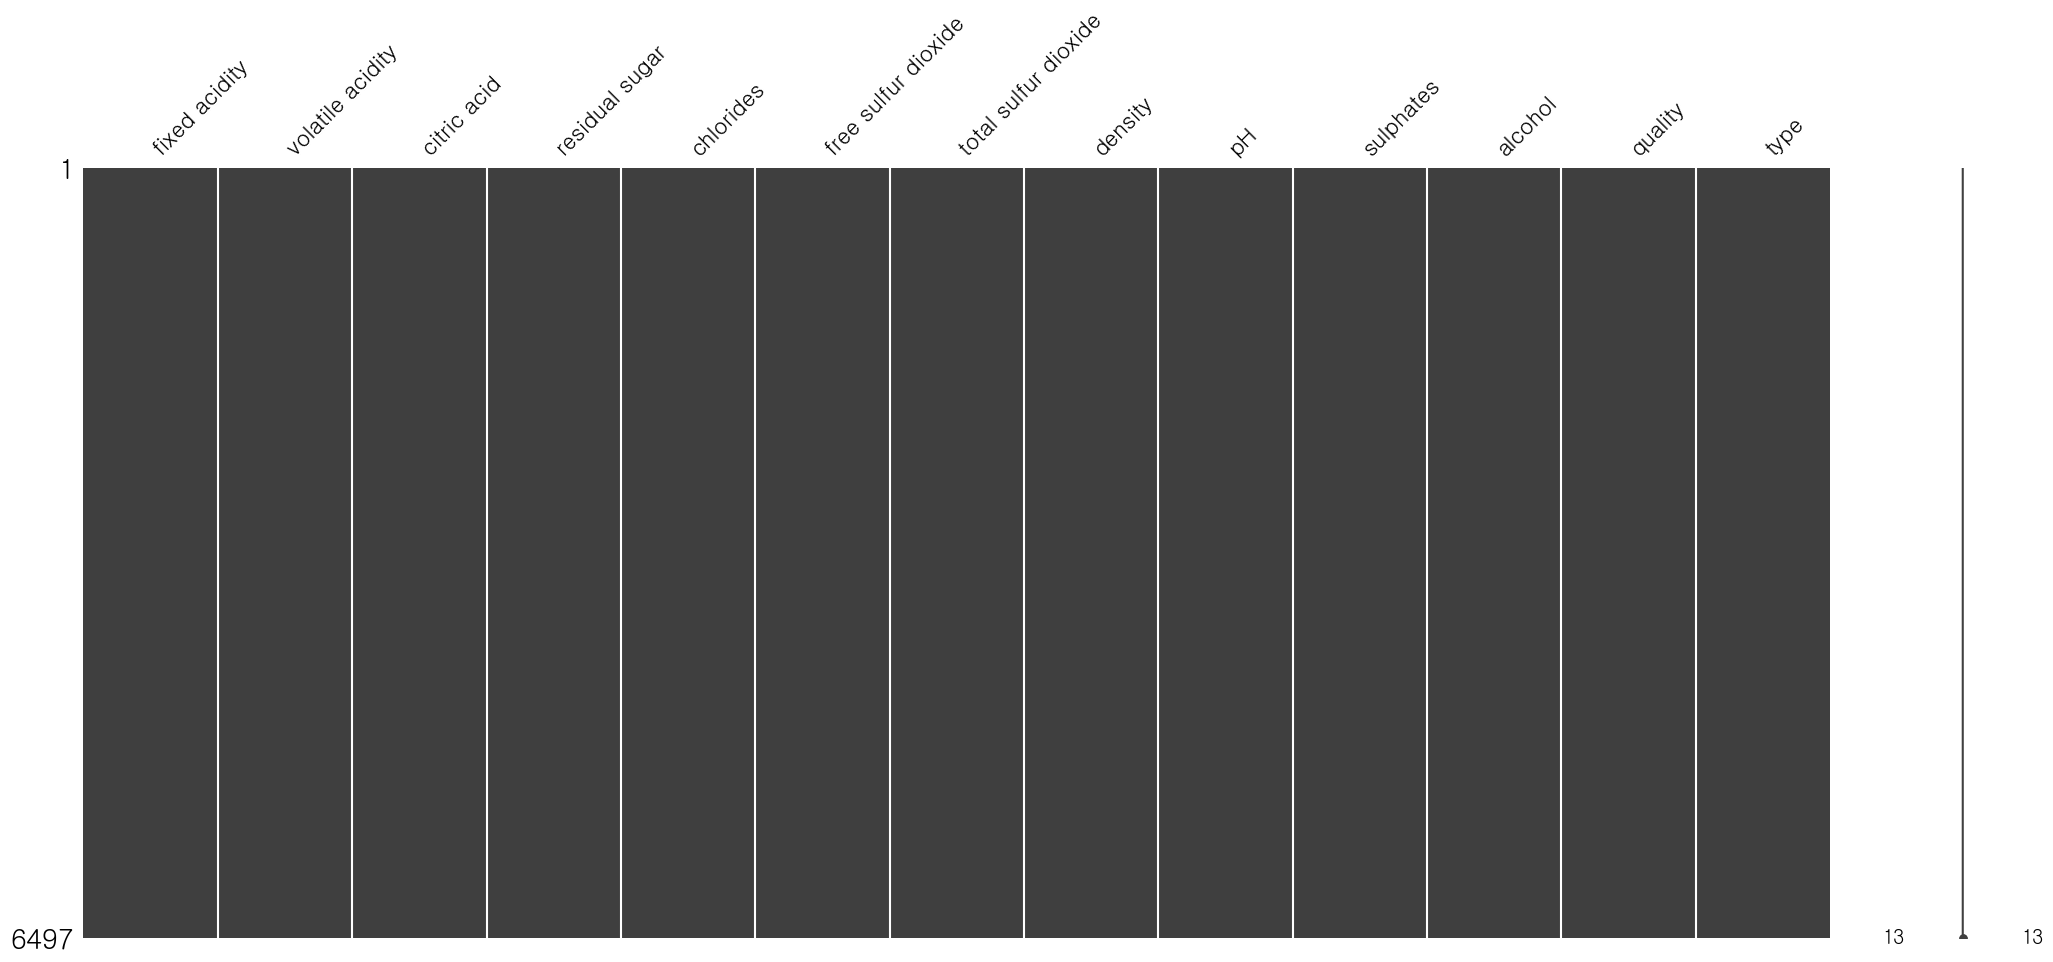

In [105]:
import missingno as msno
msno.matrix(wine)
plt.show()

### 결측치 없으므로 결측치 삭제 X

### 항목명은 공백이 안들어가게 변경

In [124]:
wine.columns = wine.columns.str.replace(" ", "_")

In [134]:
missing_count = wine.isnull().sum()
print(missing_count)

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


In [116]:
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


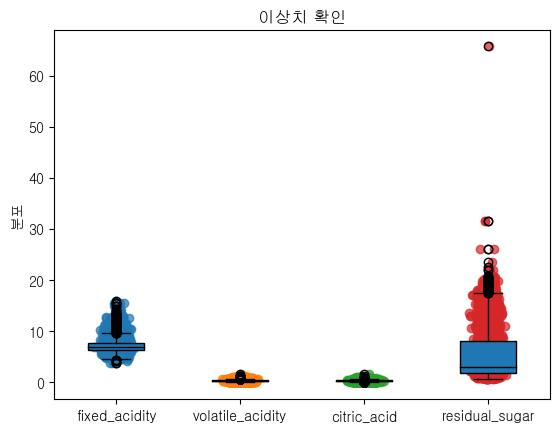

In [117]:
# 이상치 확인

import numpy as np


boxplot_data = [wine['fixed_acidity'], wine['volatile_acidity'], wine['citric_acid'], wine['residual_sugar']]
labels = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar']

fig, ax = plt.subplots()
bplot = ax.boxplot(boxplot_data, labels=labels, patch_artist=True, medianprops={'color': 'black'})

# Scatter plot
for i, (label, data) in enumerate(zip(labels, boxplot_data)):
    y = data
    x = np.random.normal(i + 1, 0.04, size=len(y))
    plt.scatter(x, y, alpha=0.7)

plt.title('이상치 확인')
plt.ylabel('분포')

plt.show()

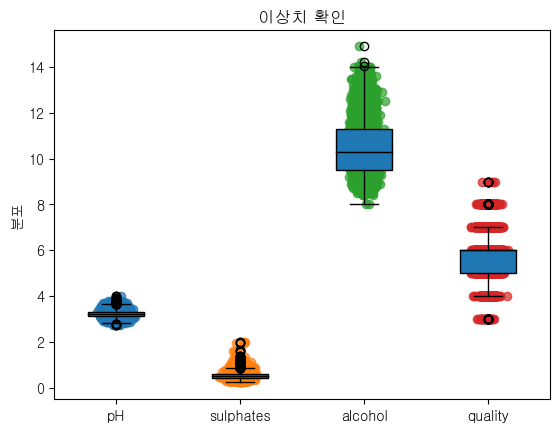

In [15]:
# 이상치 확인

boxplot_data = [wine['pH'], wine['sulphates'], wine['alcohol'], wine['quality']]
labels = ['pH', 'sulphates', 'alcohol', 'quality']

fig, ax = plt.subplots()
bplot = ax.boxplot(boxplot_data, labels=labels, patch_artist=True, medianprops={'color': 'black'})

# Scatter plot
for i, (label, data) in enumerate(zip(labels, boxplot_data)):
    y = data
    x = np.random.normal(i + 1, 0.04, size=len(y))
    plt.scatter(x, y, alpha=0.7)

plt.title('이상치 확인')
plt.ylabel('분포')

plt.show()


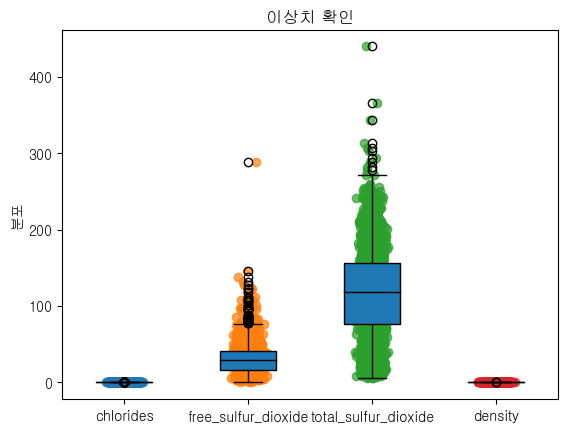

In [16]:
# 이상치 확인

boxplot_data = [wine['chlorides'], wine['free_sulfur_dioxide'], wine['total_sulfur_dioxide'], wine['density']]
labels = ['chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density']

fig, ax = plt.subplots()
bplot = ax.boxplot(boxplot_data, labels=labels, patch_artist=True, medianprops={'color': 'black'})

# Scatter plot
for i, (label, data) in enumerate(zip(labels, boxplot_data)):
    y = data
    x = np.random.normal(i + 1, 0.04, size=len(y))
    plt.scatter(x, y, alpha=0.7)

plt.title('이상치 확인')
plt.ylabel('분포')

plt.show()


### 이상치 제거

In [139]:
wine_clean = wine.copy()

In [140]:
# 이상치 제거 함수

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# 이상치 제거 적용
wine_clean = remove_outliers_iqr(wine_clean, 'fixed_acidity')
wine_clean = remove_outliers_iqr(wine_clean, 'volatile_acidity')
wine_clean = remove_outliers_iqr(wine_clean, 'citric_acid')
wine_clean = remove_outliers_iqr(wine_clean, 'residual_sugar')
wine_clean = remove_outliers_iqr(wine_clean, 'chlorides')
wine_clean = remove_outliers_iqr(wine_clean, 'free_sulfur_dioxide')
wine_clean = remove_outliers_iqr(wine_clean, 'total_sulfur_dioxide')
wine_clean = remove_outliers_iqr(wine_clean, 'density')
wine_clean = remove_outliers_iqr(wine_clean, 'pH')
wine_clean = remove_outliers_iqr(wine_clean, 'sulphates')
wine_clean = remove_outliers_iqr(wine_clean, 'alcohol')
wine_clean = remove_outliers_iqr(wine_clean, 'quality')

wine_clean

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6,0
25,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,5,0
26,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5,5,0
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6,0
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.240,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


### 결측치 및 이상치 처리 완료

### bad = 0, good = 1, 퀄리티 분류

In [141]:
wine_clean2 = wine_clean.copy()

In [142]:
# 사분위수 50% 기준
bins = (3, 6, 9)
group_names = [0, 1]
wine_clean2['quality'] = pd.cut(wine_clean2['quality'], bins = bins, labels = group_names)

label_quality = LabelEncoder()

wine_clean2['quality'] = label_quality.fit_transform(wine_clean2['quality'])

In [220]:
wine_re = wine.copy()

In [227]:
# 사분위수 50% 기준
bins = (3, 5, 7, 9)
group_names = [0, 1, 2]
wine_re['quality_new'] = pd.cut(wine_re['quality'], bins = bins, labels = group_names)

label_quality = LabelEncoder()

wine_re['quality_new'] = label_quality.fit_transform(wine_re['quality_new'])

In [222]:
wine_re

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_new
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


In [186]:
wine_new = wine.copy()

In [196]:
# 사분위수 50% 기준
bins = (3, 5, 7, 9)
group_names = [0, 1, 2]
wine_new['quality2'] = pd.cut(wine_new['quality'], bins = bins, labels = group_names)

label_quality = LabelEncoder()

wine_new['quality2'] = label_quality.fit_transform(wine_new['quality2'])

In [197]:
sorted(wine_new.quality2.unique())

[0, 1, 2, 3]

In [198]:
wine_new

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1,1


In [207]:
wine_new2 = wine_new.copy()

In [210]:
wine_new2 = wine_new2.drop("quality", axis=1)

In [209]:
sorted(wine_new2.quality2.unique())

[0, 1, 2, 3]

In [143]:
wine_clean2['quality'].value_counts()

quality
0    3543
1     875
Name: count, dtype: int64

### 3. 데이터 확인

C:\Users\thesw\AppData\Local\Temp\ipykernel_16868\2454668502.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(wine_clean.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Wine Quality Correlation')

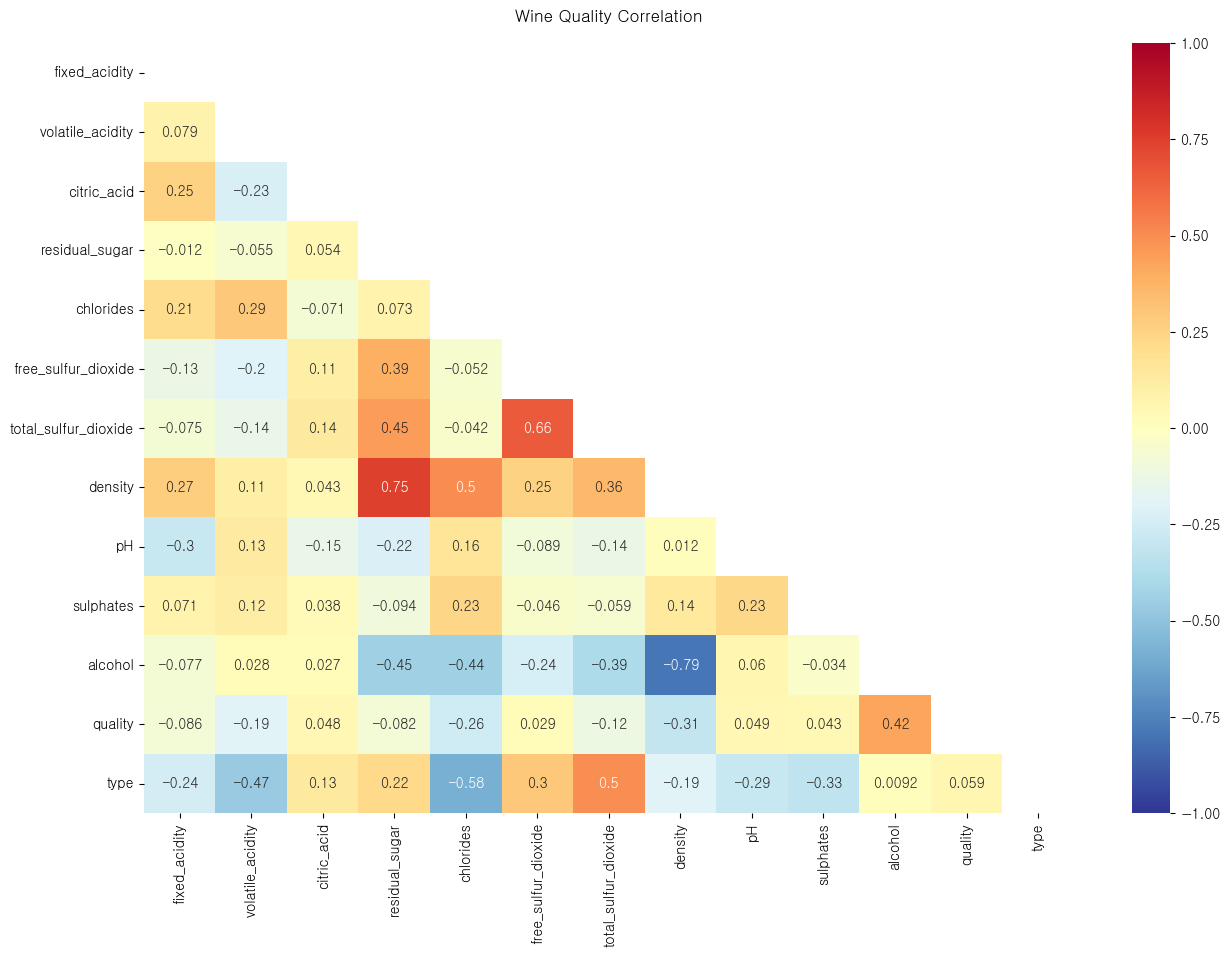

In [20]:
# 중복 제거 히트맵 시각화

# 매트릭스의 우측 상단을 모두 True인 1로, 하단을 False인 0으로 변환.
np.triu(np.ones_like(wine_clean.corr()))

# True/False mask 배열로 변환.
mask = np.triu(np.ones_like(wine_clean.corr(), dtype=np.bool))

#  히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(15, 10))
plt.grid(False)
sns.heatmap(wine_clean.corr(), 
            mask=mask, 
            vmin=-1, 
            vmax = 1, 
            annot=True, 
            cmap="RdYlBu_r", 
            cbar = True)
ax.set_title('Wine Quality Correlation', pad = 15)

### 와인 품질 예측 머신러닝

In [144]:
wine_clean

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6,0
25,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,5,0
26,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5,5,0
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6,0
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.240,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [145]:
wine_clean2

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,0,0
25,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.99550,3.34,0.56,9.3,0,0
26,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5,0,0
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,0,0
37,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.210,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,1
4894,6.6,0.320,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,1
4895,6.5,0.240,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,1
4896,5.5,0.290,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,1


import

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical


### 1. 랜덤 포레스트 wine_clean

Train Accuracy: 0.9734012450481041
Validation Accuracy: 0.7002262443438914


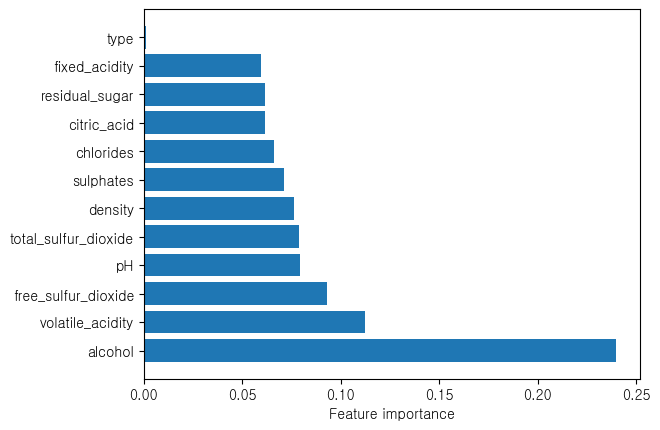


Classification Report for Train Data:
               precision    recall  f1-score   support

           4       1.00      0.49      0.66        90
           5       0.96      0.98      0.97      1070
           6       0.97      1.00      0.99      1668
           7       1.00      0.97      0.98       706

    accuracy                           0.97      3534
   macro avg       0.98      0.86      0.90      3534
weighted avg       0.97      0.97      0.97      3534


Classification Report for Validation Data:
               precision    recall  f1-score   support

           4       0.50      0.03      0.06        29
           5       0.74      0.66      0.70       259
           6       0.66      0.87      0.75       427
           7       0.84      0.45      0.58       169

    accuracy                           0.70       884
   macro avg       0.68      0.50      0.52       884
weighted avg       0.71      0.70      0.68       884



In [146]:
from sklearn.metrics import classification_report

def show_feature_importance(model, feature_labels):
    importance = model.feature_importances_
    zipped = sorted(zip(feature_labels, importance), key=lambda x: x[1], reverse=True)
    _, ax = plt.subplots()
    ax.barh(range(len(zipped)), [imp for f, imp in zipped], align='center')
    ax.set_yticks(range(len(zipped)))
    ax.set_yticklabels([f for f, _ in zipped])
    ax.set_xlabel('Feature importance')
    plt.show()

# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean.drop("quality", axis=1)
y = wine_clean["quality"]

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# 랜덤포레스트 모델 생성 및 훈련
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

y_pred_rounded = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred_rounded)

# 훈련 데이터 예측 및 정확도 계산
y_train_pred = random_forest.predict(X_train)
y_train_pred_rounded = np.round(y_train_pred).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred_rounded)

# 검증 데이터 예측 및 정확도 계산
y_test_pred = random_forest.predict(X_test)
y_test_pred_rounded = np.round(y_test_pred).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred_rounded)

# print("Mean Squared Error:", mse)
# print("Root Mean Squared Error:", rmse)
# print("Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)

show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))


show_feature_importance
참고 : https://data-marketing-bk.tistory.com/entry/%EA%B8%B0%EC%B4%88-%EB%AA%A8%EB%8D%B8%EB%A7%81-%EC%97%B0%EC%8A%B5-%EC%99%80%EC%9D%B8-%ED%92%88%EC%A7%88-%EC%98%88%EC%B8%A1%EC%9D%84-%EC%9C%84%ED%95%9C-%EB%AA%A8%EB%8D%B8%EB%A7%81Wine-Quality-Prediction

### 1-2. 랜덤 포레스트 wine_clean2

Train Accuracy: 1.0
Validation Accuracy: 0.8902714932126696


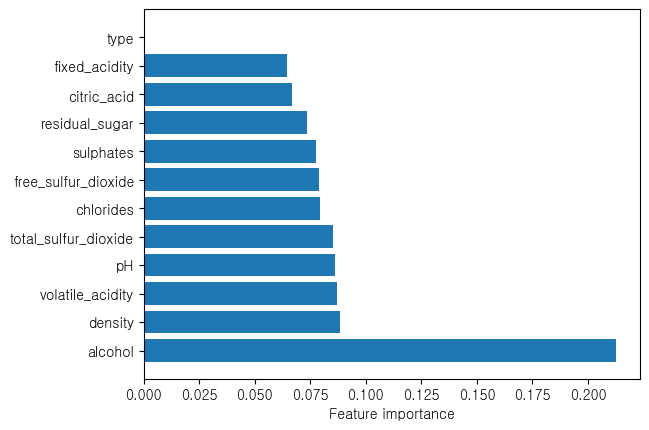


Classification Report for Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2828
           1       1.00      1.00      1.00       706

    accuracy                           1.00      3534
   macro avg       1.00      1.00      1.00      3534
weighted avg       1.00      1.00      1.00      3534


Classification Report for Validation Data:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       715
           1       0.78      0.59      0.67       169

    accuracy                           0.89       884
   macro avg       0.84      0.78      0.80       884
weighted avg       0.88      0.89      0.88       884



In [147]:
from sklearn.metrics import classification_report

def show_feature_importance(model, feature_labels):
    importance = model.feature_importances_
    zipped = sorted(zip(feature_labels, importance), key=lambda x: x[1], reverse=True)
    _, ax = plt.subplots()
    ax.barh(range(len(zipped)), [imp for f, imp in zipped], align='center')
    ax.set_yticks(range(len(zipped)))
    ax.set_yticklabels([f for f, _ in zipped])
    ax.set_xlabel('Feature importance')
    plt.show()

# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean2.drop("quality", axis=1)
y = wine_clean2["quality"]

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# 랜덤포레스트 모델 생성 및 훈련
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

y_pred_rounded = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred_rounded)

# 훈련 데이터 예측 및 정확도 계산
y_train_pred = random_forest.predict(X_train)
y_train_pred_rounded = np.round(y_train_pred).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred_rounded)

# 검증 데이터 예측 및 정확도 계산
y_test_pred = random_forest.predict(X_test)
y_test_pred_rounded = np.round(y_test_pred).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred_rounded)

# print("Mean Squared Error:", mse)
# print("Root Mean Squared Error:", rmse)
# print("Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)

show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))


### 1-3. 랜덤포레스트 wine_clean2 + 열제거
히트맵에서 연관성이 없었던 열 제거
fixed_acidity, citric_acid, residual_sugar, free_sulfur_dioxide, total_sulfur_dioxide, pH, sulphates

In [176]:
cols_to_drop = ['fixed_acidity', 'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates']
wine_clean3 = wine_clean2.drop(columns=cols_to_drop)

Train Accuracy: 0.9988681380871534
Validation Accuracy: 0.8721719457013575


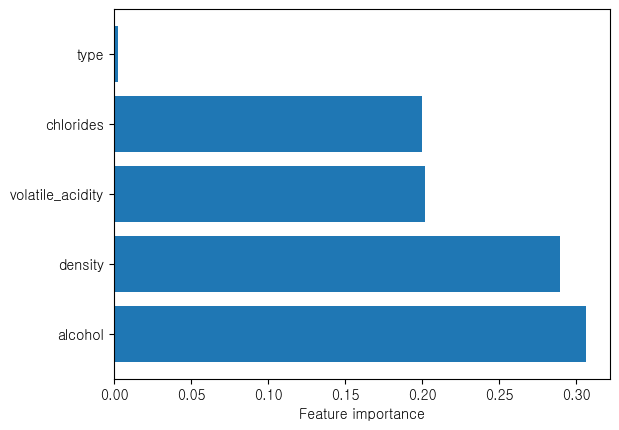


Classification Report for Train Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2828
           1       0.99      1.00      1.00       706

    accuracy                           1.00      3534
   macro avg       1.00      1.00      1.00      3534
weighted avg       1.00      1.00      1.00      3534


Classification Report for Validation Data:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       715
           1       0.70      0.58      0.63       169

    accuracy                           0.87       884
   macro avg       0.80      0.76      0.78       884
weighted avg       0.87      0.87      0.87       884



In [177]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean3.drop("quality", axis=1)
y = wine_clean3["quality"]

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# 랜덤포레스트 모델 생성 및 훈련
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

y_pred_rounded = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred_rounded)

# 훈련 데이터 예측 및 정확도 계산
y_train_pred = random_forest.predict(X_train)
y_train_pred_rounded = np.round(y_train_pred).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred_rounded)

# 검증 데이터 예측 및 정확도 계산
y_test_pred = random_forest.predict(X_test)
y_test_pred_rounded = np.round(y_test_pred).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred_rounded)

# print("Mean Squared Error:", mse)
# print("Root Mean Squared Error:", rmse)
# print("Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)

show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))


### wine_new

In [215]:
wine_new

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,3,1,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,2,1,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,3,1,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,4,1,1


In [216]:
wine_new2

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,type,quality2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,1


Train Accuracy: 1.0
Validation Accuracy: 0.8653846153846154


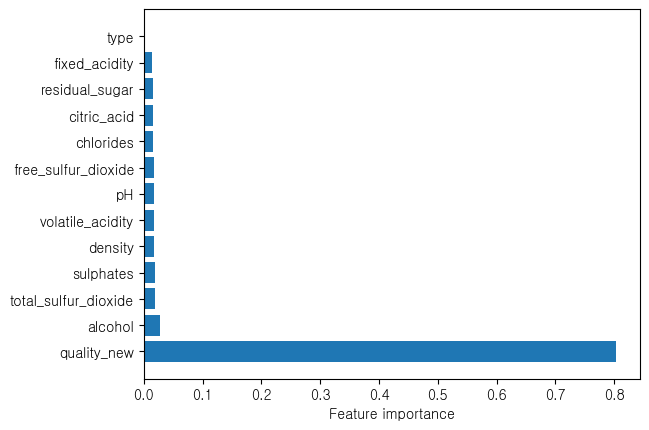


Classification Report for Train Data:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00       173
           5       1.00      1.00      1.00      1736
           6       1.00      1.00      1.00      2239
           7       1.00      1.00      1.00       864
           8       1.00      1.00      1.00       157
           9       1.00      1.00      1.00         4

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197


Classification Report for Validation Data:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       0.53      0.21      0.30        43
           5       0.92      0.98      0.95       402
           6       0.86      0.93      0.89       597
           7       0.75      0.57      0.65    

c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [228]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_re.drop("quality", axis=1)
y = wine_re["quality"]

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# 랜덤포레스트 모델 생성 및 훈련
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

y_pred_rounded = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred_rounded)

# 훈련 데이터 예측 및 정확도 계산
y_train_pred = random_forest.predict(X_train)
y_train_pred_rounded = np.round(y_train_pred).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred_rounded)

# 검증 데이터 예측 및 정확도 계산
y_test_pred = random_forest.predict(X_test)
y_test_pred_rounded = np.round(y_test_pred).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred_rounded)

# print("Mean Squared Error:", mse)
# print("Root Mean Squared Error:", rmse)
# print("Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)

show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))


### wine_re2

In [230]:
wine_re2 = wine_re.copy()
cols_to_drop = ['fixed_acidity', 'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'pH', 'sulphates']
wine_re2 = wine_re2.drop(columns=cols_to_drop)

Train Accuracy: 0.9994227438907062
Validation Accuracy: 0.8561538461538462


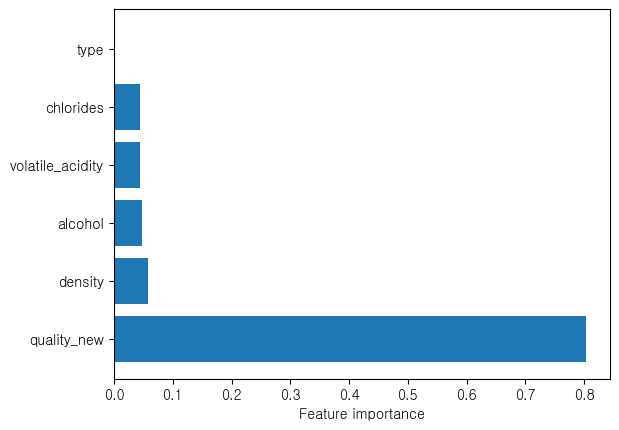


Classification Report for Train Data:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00       173
           5       1.00      1.00      1.00      1736
           6       1.00      1.00      1.00      2239
           7       1.00      1.00      1.00       864
           8       1.00      1.00      1.00       157
           9       1.00      1.00      1.00         4

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197


Classification Report for Validation Data:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00         6
           4       0.67      0.23      0.34        43
           5       0.92      0.99      0.95       402
           6       0.86      0.90      0.88       597
           7       0.68      0.59      0.63    

c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [231]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_re2.drop("quality", axis=1)
y = wine_re2["quality"]

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# 랜덤포레스트 모델 생성 및 훈련
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

# 예측 및 성능 평가
y_pred = random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

y_pred_rounded = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred_rounded)

# 훈련 데이터 예측 및 정확도 계산
y_train_pred = random_forest.predict(X_train)
y_train_pred_rounded = np.round(y_train_pred).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred_rounded)

# 검증 데이터 예측 및 정확도 계산
y_test_pred = random_forest.predict(X_test)
y_test_pred_rounded = np.round(y_test_pred).astype(int)
test_accuracy = accuracy_score(y_test, y_test_pred_rounded)

# print("Mean Squared Error:", mse)
# print("Root Mean Squared Error:", rmse)
# print("Accuracy:", accuracy)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)

show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))


### 2. 선형회귀 wine_clean

Train Accuracy: 0.5390492359932089
Validation Accuracy: 0.5735294117647058


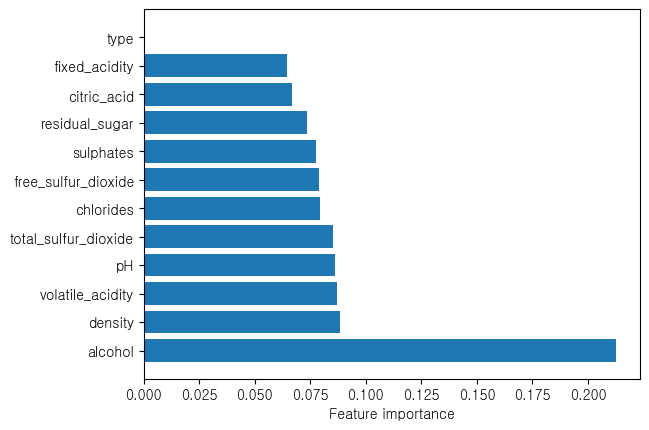


Classification Report for Train Data:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        90
           5       0.60      0.39      0.47      1070
           6       0.52      0.83      0.64      1668
           7       0.60      0.14      0.23       706

    accuracy                           0.54      3534
   macro avg       0.43      0.34      0.34      3534
weighted avg       0.55      0.54      0.49      3534


Classification Report for Validation Data:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        29
           5       0.63      0.41      0.50       259
           6       0.56      0.87      0.68       427
           7       0.61      0.17      0.26       169

    accuracy                           0.57       884
   macro avg       0.45      0.36      0.36       884
weighted avg       0.57      0.57      0.52       884



c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [149]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean.drop("quality", axis=1)
y = wine_clean["quality"]

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# 예측 및 성능 평가
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

y_train_pred_rounded = np.round(y_train_pred).astype(int)
y_test_pred_rounded = np.round(y_test_pred).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred_rounded)
test_accuracy = accuracy_score(y_test, y_test_pred_rounded)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)
#print("Train MSE:", mse_train)
#print("Validation MSE:", mse_test)

show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))


### 2. 선형회귀 wine_clean2

Train Accuracy: 0.8135257498585172
Validation Accuracy: 0.8212669683257918


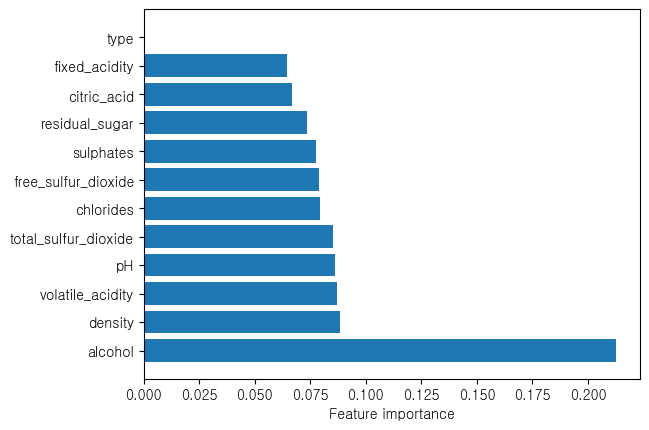


Classification Report for Train Data:
               precision    recall  f1-score   support

           0       0.82      0.99      0.89      2828
           1       0.72      0.11      0.19       706

    accuracy                           0.81      3534
   macro avg       0.77      0.55      0.54      3534
weighted avg       0.80      0.81      0.75      3534


Classification Report for Validation Data:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       715
           1       0.70      0.11      0.19       169

    accuracy                           0.82       884
   macro avg       0.76      0.55      0.55       884
weighted avg       0.80      0.82      0.76       884



In [150]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean2.drop("quality", axis=1)
y = wine_clean2["quality"]

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성 및 훈련
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# 예측 및 성능 평가
y_train_pred = linear_regression.predict(X_train)
y_test_pred = linear_regression.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

y_train_pred_rounded = np.round(y_train_pred).astype(int)
y_test_pred_rounded = np.round(y_test_pred).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred_rounded)
test_accuracy = accuracy_score(y_test, y_test_pred_rounded)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)
#print("Train MSE:", mse_train)
#print("Validation MSE:", mse_test)

show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))


### 3. 로지스틱 회귀 wine_clean

Train Accuracy: 0.5466893039049237
Validation Accuracy: 0.5463800904977375


c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


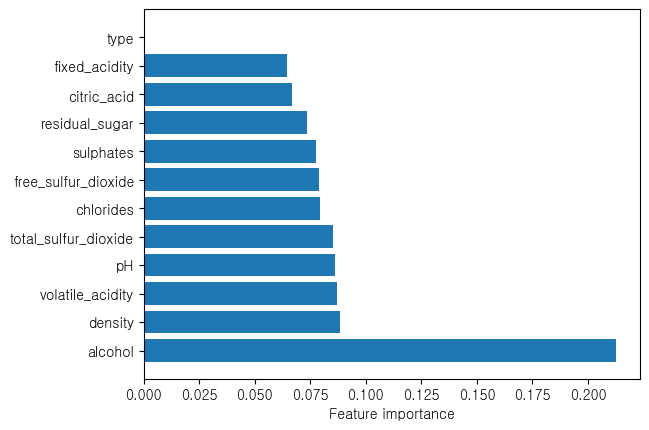


Classification Report for Train Data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00      90.0
           5       0.00      0.00      0.00    1070.0
           6       0.00      0.00      0.00    1668.0
           7       0.00      0.00      0.00     706.0

    accuracy                           0.00    3534.0
   macro avg       0.00      0.00      0.00    3534.0
weighted avg       0.00      0.00      0.00    3534.0


Classification Report for Validation Data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00      29.0
           5       0.00      0.00      0.00     259.0
           6       0.00      0.00      0.00     427.0
           7       0.00      0.00      0.00    

c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [151]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean.drop("quality", axis=1)
y = wine_clean["quality"]

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 훈련
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)

# 예측 및 성능 평가
y_train_pred = logistic_regression.predict(X_train)
y_test_pred = logistic_regression.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)
show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))


### 3. 로지스틱 회귀 wine_clean2

Train Accuracy: 0.8109790605546123
Validation Accuracy: 0.8133484162895928


c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


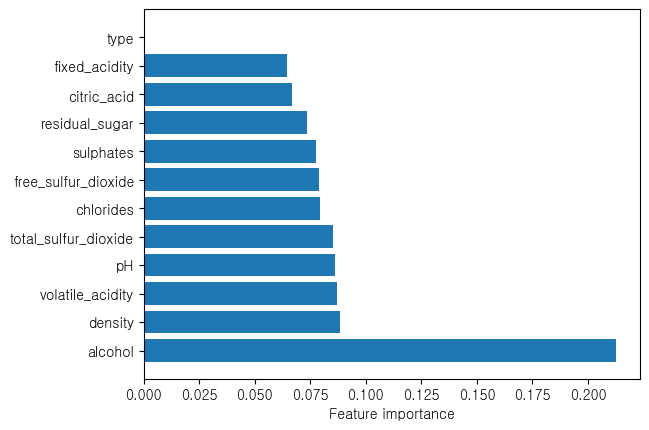


Classification Report for Train Data:
               precision    recall  f1-score   support

           0       0.82      0.99      0.89      2828
           1       0.72      0.11      0.19       706

    accuracy                           0.81      3534
   macro avg       0.77      0.55      0.54      3534
weighted avg       0.80      0.81      0.75      3534


Classification Report for Validation Data:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       715
           1       0.70      0.11      0.19       169

    accuracy                           0.82       884
   macro avg       0.76      0.55      0.55       884
weighted avg       0.80      0.82      0.76       884



In [152]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean2.drop("quality", axis=1)
y = wine_clean2["quality"]

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성 및 훈련
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)

# 예측 및 성능 평가
y_train_pred = logistic_regression.predict(X_train)
y_test_pred = logistic_regression.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)
show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))


### 4. 라쏘 회귀 알고리즘 wine_clean

Train Accuracy: 0.0
Validation Accuracy: 0.0


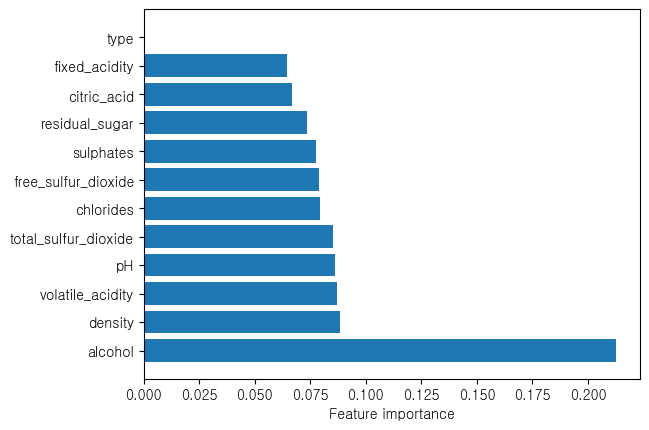


Classification Report for Train Data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00     103.0
           5       0.00      0.00      0.00    1075.0
           6       0.00      0.00      0.00    1681.0
           7       0.00      0.00      0.00     675.0

    accuracy                           0.00    3534.0
   macro avg       0.00      0.00      0.00    3534.0
weighted avg       0.00      0.00      0.00    3534.0


Classification Report for Validation Data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00      16.0
           5       0.00      0.00      0.00     254.0
           6       0.00      0.00      0.00     414.0
           7       0.00      0.00      0.00    

c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [156]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean.drop("quality", axis=1)
y = wine_clean["quality"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# 모델 생성 및 학습
lasso_model = Lasso(alpha=0.1)  # default : alpha = 0.1
lasso_model.fit(X_train, y_train)

# 예측 수행
y_pred = lasso_model.predict(X_test)

# 예측 결과 계산
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 예측 및 성능 평가
y_train_pred = logistic_regression.predict(X_train)
y_test_pred = logistic_regression.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)
#print(f"\nMean Absolute Error: {mae:.2f}")
#print(f"\nR^2 Score: {r2:.2f}")

show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))

### 4. 라쏘 회귀 알고리즘 wine_clean2

Train Accuracy: 0.8174872665534805
Validation Accuracy: 0.7873303167420814


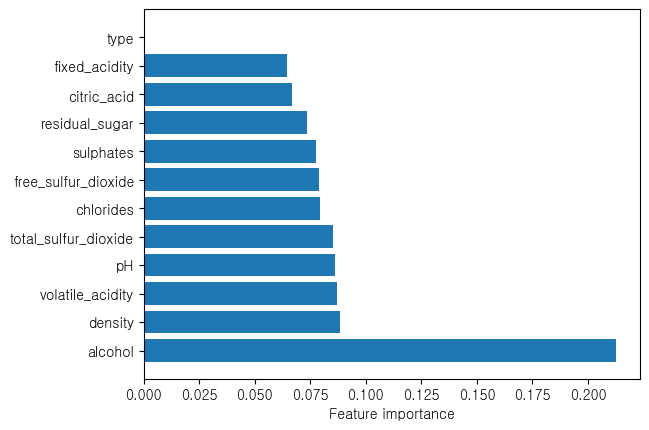


Classification Report for Train Data:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      2859
           1       0.24      0.04      0.06       675

    accuracy                           0.79      3534
   macro avg       0.52      0.50      0.47      3534
weighted avg       0.70      0.79      0.73      3534


Classification Report for Validation Data:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       684
           1       0.22      0.03      0.05       200

    accuracy                           0.76       884
   macro avg       0.50      0.50      0.46       884
weighted avg       0.65      0.76      0.68       884



In [157]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean2.drop("quality", axis=1)
y = wine_clean2["quality"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# 모델 생성 및 학습
lasso_model = Lasso(alpha=0.1)  # default : alpha = 0.1
lasso_model.fit(X_train, y_train)

# 예측 수행
y_pred = lasso_model.predict(X_test)

# 예측 결과 계산
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 예측 및 성능 평가
y_train_pred = logistic_regression.predict(X_train)
y_test_pred = logistic_regression.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)
#print(f"\nMean Absolute Error: {mae:.2f}")
#print(f"\nR^2 Score: {r2:.2f}")

show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))

### 5. MLP wine_clean

In [160]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean.drop("quality", axis=1)
y = wine_clean["quality"]

# 데이터 표준화 : 특성 스케일링을 위해 StandardScaler를 사용
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 모델 생성 및 학습 (MLPRegressor) : 은닉층(hidden_layer_sizes)이 각각 300개의 노드를 갖는 2개층으로 
# 구성된 신경망 MLPRegressor를 생성하고, 최대 500번 학습
mlp = MLPRegressor(hidden_layer_sizes=(300, 300), max_iter=500, alpha=0.009, random_state=42)
# Cross-Validation : 교차 검증으로 모델의 성능 평가. 
# 사용된 평가 지표는 'mean_absolute_error'(MAE). 
# cv = 5-겹 교차 검증 사용
cv_scores = cross_val_score(mlp, X, y, cv=5, scoring='neg_mean_absolute_error')

mlp.fit(X, y)


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 예측 결과 계산
y_pred = mlp.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 실제 값과 예측 값 비교
comparison = pd.DataFrame(columns=["실제 값", "예측 값"])
comparison["실제 값"] = y_test.reset_index(drop=True)
comparison["예측 값"] = y_pred

# 예측 및 성능 평가
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# 예측 결과 출력

#print(f"Cross-Validation Mean Absolute Error: {-cv_scores.mean():.2f}")
#print(f"Mean Absolute Error: {mae:.2f}")
#print(f"R^2 Score: {r2:.2f}")

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)
show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))

Train Accuracy: 0.656479909451047
Validation Accuracy: 0.6719457013574661


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### 5. MLP wine_clean2

In [ ]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean.drop("quality", axis=1)
y = wine_clean["quality"]

# 데이터 표준화 : 특성 스케일링을 위해 StandardScaler를 사용
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 모델 생성 및 학습 (MLPRegressor) : 은닉층(hidden_layer_sizes)이 각각 300개의 노드를 갖는 2개층으로 
# 구성된 신경망 MLPRegressor를 생성하고, 최대 500번 학습
mlp = MLPRegressor(hidden_layer_sizes=(300, 300), max_iter=500, alpha=0.009, random_state=42)
# Cross-Validation : 교차 검증으로 모델의 성능 평가. 
# 사용된 평가 지표는 'mean_absolute_error'(MAE). 
# cv = 5-겹 교차 검증 사용
cv_scores = cross_val_score(mlp, X, y, cv=5, scoring='neg_mean_absolute_error')

mlp.fit(X, y)


# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 예측 결과 계산
y_pred = mlp.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 실제 값과 예측 값 비교
comparison = pd.DataFrame(columns=["실제 값", "예측 값"])
comparison["실제 값"] = y_test.reset_index(drop=True)
comparison["예측 값"] = y_pred

# 예측 및 성능 평가
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# 예측 결과 출력
print("\n실제 값 vs. 예측 값:")
print(comparison)

#print(f"Cross-Validation Mean Absolute Error: {-cv_scores.mean():.2f}")
#print(f"Mean Absolute Error: {mae:.2f}")
#print(f"R^2 Score: {r2:.2f}")

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)
show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))

### 6. K-최근접 이웃 wine_clean

Train Accuracy: 0.6778783958602846
Validation Accuracy: 0.48717948717948717


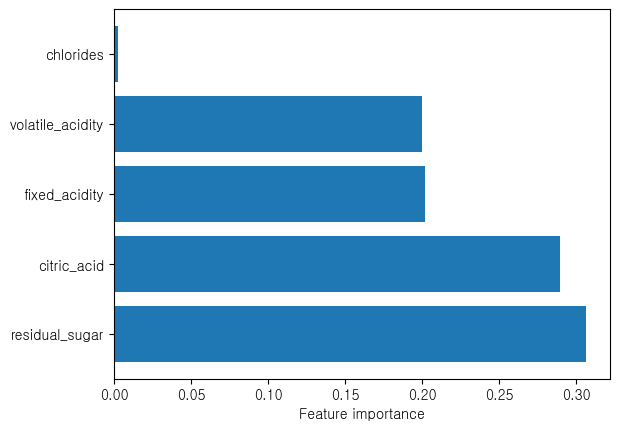

ValueError: Found input variables with inconsistent numbers of samples: [3092, 3534]

In [180]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean.drop("quality", axis=1)
y = wine_clean["quality"]

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# K-Nearest Neighbors 모델 생성 및 훈련
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측 및 성능 평가
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)
show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))

### 6. K-최근접 이웃 wine_clean2

Train Accuracy: 0.868421052631579
Validation Accuracy: 0.7850678733031674


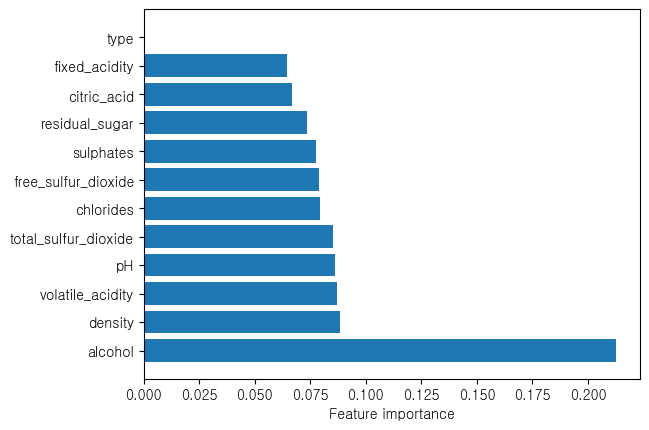


Classification Report for Train Data:
               precision    recall  f1-score   support

           0       0.82      0.99      0.89      2828
           1       0.72      0.11      0.19       706

    accuracy                           0.81      3534
   macro avg       0.77      0.55      0.54      3534
weighted avg       0.80      0.81      0.75      3534


Classification Report for Validation Data:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90       715
           1       0.70      0.11      0.19       169

    accuracy                           0.82       884
   macro avg       0.76      0.55      0.55       884
weighted avg       0.80      0.82      0.76       884



In [162]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean2.drop("quality", axis=1)
y = wine_clean2["quality"]

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors 모델 생성 및 훈련
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측 및 성능 평가
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)
show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))

In [174]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean2.drop("quality", axis=1)
y = wine_clean2["quality"]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors 모델 생성 및 훈련
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 예측 및 성능 평가
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)



print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)

Train Accuracy: 0.8828522920203735
Validation Accuracy: 0.8438914027149321


### 7. 의사 결정 트리 wine_clean

Train Accuracy: 1.0
Validation Accuracy: 0.6278280542986425


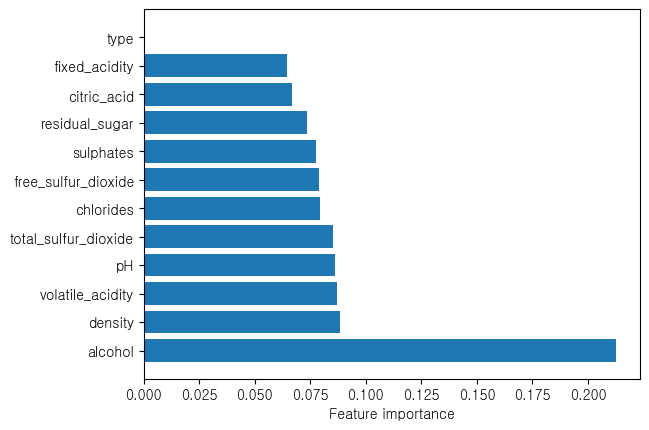


Classification Report for Train Data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00      90.0
           5       0.00      0.00      0.00    1070.0
           6       0.00      0.00      0.00    1668.0
           7       0.00      0.00      0.00     706.0

    accuracy                           0.00    3534.0
   macro avg       0.00      0.00      0.00    3534.0
weighted avg       0.00      0.00      0.00    3534.0


Classification Report for Validation Data:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00      29.0
           5       0.00      0.00      0.00     259.0
           6       0.00      0.00      0.00     427.0
           7       0.00      0.00      0.00    

c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [164]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean.drop("quality", axis=1)
y = wine_clean["quality"]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 의사 결정 트리 모델 생성 및 훈련
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# 예측 및 성능 평가
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)
show_feature_importance(random_forest, X.columns)
print("\nClassification Report for Train Data:\n", classification_report(y_train, y_train_pred_rounded))
print("\nClassification Report for Validation Data:\n", classification_report(y_test, y_test_pred_rounded))


### 7. 의사 결정 트리 wine_clean2

In [165]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean2.drop("quality", axis=1)
y = wine_clean2["quality"]

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 의사 결정 트리 모델 생성 및 훈련
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# 예측 및 성능 평가
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)


Train Accuracy: 1.0
Validation Accuracy: 0.8133484162895928


### 8. 서포트 벡터 머신 wine_clean

In [166]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean.drop("quality", axis=1)
y = wine_clean["quality"]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 서포트 벡터 머신 모델 생성 및 훈련
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# 예측 및 성능 평가
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)


Train Accuracy: 0.5342388228636107
Validation Accuracy: 0.5757918552036199


### 8. 서포트 벡터 머신 wine_clean2

In [167]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean2.drop("quality", axis=1)
y = wine_clean2["quality"]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# 서포트 벡터 머신 모델 생성 및 훈련
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# 예측 및 성능 평가
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)


Train Accuracy: 0.8002263723825693
Validation Accuracy: 0.8088235294117647


### XGB wine_clean

In [170]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean.drop("quality", axis=1)
y = wine_clean["quality"]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 종속 변수의 클래스 레이블 값을 연속적인 정수로 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBClassifier 모델 생성 및 훈련
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)

# 예측 및 성능 평가
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)


c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Train Accuracy: 0.9968873797396718
Validation Accuracy: 0.6990950226244343


In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean2.drop("quality", axis=1)
y = wine_clean2["quality"]

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 종속 변수의 클래스 레이블 값을 연속적인 정수로 변환
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBClassifier 모델 생성 및 훈련
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train, y_train_encoded)

# 예측 및 성능 평가
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)


Train Accuracy: 1.0
Validation Accuracy: 0.8800904977375565


c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


### 10. 인공신경망 Artificial Neural Networks wine_clean

In [172]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean.drop("quality", axis=1)
y = wine_clean["quality"]

# 레이블을 원-핫 인코딩 형식으로 변환
y_one_hot = to_categorical(y)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Feature Scaling (인공신경망에 적용할 때 보통 StandardScaler 사용)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 인공 신경망 모델 생성 및 훈련
model = Sequential()
#model.add(Dense(units=12, activation='relu', input_dim=11))
model.add(Dense(units=12, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=y_one_hot.shape[1], activation='softmax'))


model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

# 예측 및 성능 평가
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)

Epoch 1/100


c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


221/221 - 1s - loss: 1.8264 - accuracy: 0.3882 - 589ms/epoch - 3ms/step
Epoch 2/100
221/221 - 0s - loss: 1.1758 - accuracy: 0.4935 - 211ms/epoch - 956us/step
Epoch 3/100
221/221 - 0s - loss: 1.0527 - accuracy: 0.5297 - 226ms/epoch - 1ms/step
Epoch 4/100
221/221 - 0s - loss: 1.0157 - accuracy: 0.5396 - 205ms/epoch - 929us/step
Epoch 5/100
221/221 - 0s - loss: 0.9904 - accuracy: 0.5569 - 208ms/epoch - 943us/step
Epoch 6/100
221/221 - 0s - loss: 0.9726 - accuracy: 0.5724 - 204ms/epoch - 925us/step
Epoch 7/100
221/221 - 0s - loss: 0.9585 - accuracy: 0.5784 - 198ms/epoch - 897us/step
Epoch 8/100
221/221 - 0s - loss: 0.9487 - accuracy: 0.5798 - 221ms/epoch - 1ms/step
Epoch 9/100
221/221 - 0s - loss: 0.9387 - accuracy: 0.5855 - 221ms/epoch - 1ms/step
Epoch 10/100
221/221 - 0s - loss: 0.9303 - accuracy: 0.5840 - 213ms/epoch - 965us/step
Epoch 11/100
221/221 - 0s - loss: 0.9248 - accuracy: 0.5855 - 222ms/epoch - 1ms/step
Epoch 12/100
221/221 - 0s - loss: 0.9172 - accuracy: 0.5900 - 201ms/epoch 

### 10. 인공신경망 Artificial Neural Networks wine_clean2

In [173]:
# X: 종속 변수를 제외한 데이터, y: 종속 변수
X = wine_clean2.drop("quality", axis=1)
y = wine_clean2["quality"]

# 레이블을 원-핫 인코딩 형식으로 변환
y_one_hot = to_categorical(y)

# train-test 데이터셋 구분 (보통 80:20으로 나눔. 필요에 따라 변경 가능)
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Feature Scaling (인공신경망에 적용할 때 보통 StandardScaler 사용)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 인공 신경망 모델 생성 및 훈련
model = Sequential()
#model.add(Dense(units=12, activation='relu', input_dim=11))
model.add(Dense(units=12, activation='relu', input_dim=X_train.shape[1]))

model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=y_one_hot.shape[1], activation='softmax'))


model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=2)

# 예측 및 성능 평가
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", test_accuracy)

Epoch 1/100


c:\Users\thesw\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


221/221 - 1s - loss: 0.6676 - accuracy: 0.6157 - 536ms/epoch - 2ms/step
Epoch 2/100
221/221 - 0s - loss: 0.4694 - accuracy: 0.8011 - 197ms/epoch - 893us/step
Epoch 3/100
221/221 - 0s - loss: 0.4277 - accuracy: 0.8059 - 195ms/epoch - 884us/step
Epoch 4/100
221/221 - 0s - loss: 0.4131 - accuracy: 0.8059 - 227ms/epoch - 1ms/step
Epoch 5/100
221/221 - 0s - loss: 0.4047 - accuracy: 0.8113 - 199ms/epoch - 902us/step
Epoch 6/100
221/221 - 0s - loss: 0.3978 - accuracy: 0.8149 - 195ms/epoch - 884us/step
Epoch 7/100
221/221 - 0s - loss: 0.3934 - accuracy: 0.8181 - 227ms/epoch - 1ms/step
Epoch 8/100
221/221 - 0s - loss: 0.3895 - accuracy: 0.8212 - 199ms/epoch - 902us/step
Epoch 9/100
221/221 - 0s - loss: 0.3868 - accuracy: 0.8237 - 199ms/epoch - 902us/step
Epoch 10/100
221/221 - 0s - loss: 0.3844 - accuracy: 0.8212 - 198ms/epoch - 897us/step
Epoch 11/100
221/221 - 0s - loss: 0.3822 - accuracy: 0.8189 - 211ms/epoch - 956us/step
Epoch 12/100
221/221 - 0s - loss: 0.3796 - accuracy: 0.8234 - 199ms/ep

In [175]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# 인공 신경망 모델을 반환하는 함수 생성
def create_model(optimizer='adam', neurons=12):
    model = Sequential()
    model.add(Dense(units=neurons, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=y_one_hot.shape[1], activation='softmax'))
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# KerasClassifier 래퍼를 사용하여 분류기 생성
classifier = KerasClassifier(build_fn=create_model, epochs=100, batch_size=16, verbose=2)

# 그리드 서치에 사용할 패러미터 설정
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'neurons': [12, 16, 20],
}

# GridSearchCV 객체 생성 및 적용
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, verbose=2, return_train_score=True)
grid_result = grid_search.fit(X_train, y_train)

# 결과 출력
print("Best Validation Score: {:0.3f}".format(grid_result.best_score_))
print("Best Parameters: ", grid_result.best_params_)

# 성능 측정과 비교를 위해 테스트 데이터셋에서의 정확도 출력
best_model = grid_result.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy: {:0.3f}".format(test_accuracy))


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Epoch 1/100


C:\Users\thesw\AppData\Local\Temp\ipykernel_16868\2170589131.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn=create_model, epochs=100, batch_size=16, verbose=2)


148/148 - 0s - loss: 0.5298 - accuracy: 0.7988 - 476ms/epoch - 3ms/step
Epoch 2/100
148/148 - 0s - loss: 0.4653 - accuracy: 0.8001 - 155ms/epoch - 1ms/step
Epoch 3/100
148/148 - 0s - loss: 0.4393 - accuracy: 0.8009 - 133ms/epoch - 896us/step
Epoch 4/100
148/148 - 0s - loss: 0.4248 - accuracy: 0.8077 - 129ms/epoch - 869us/step
Epoch 5/100
148/148 - 0s - loss: 0.4153 - accuracy: 0.8115 - 132ms/epoch - 889us/step
Epoch 6/100
148/148 - 0s - loss: 0.4079 - accuracy: 0.8111 - 138ms/epoch - 929us/step
Epoch 7/100
148/148 - 0s - loss: 0.4014 - accuracy: 0.8171 - 153ms/epoch - 1ms/step
Epoch 8/100
148/148 - 0s - loss: 0.3974 - accuracy: 0.8179 - 138ms/epoch - 929us/step
Epoch 9/100
148/148 - 0s - loss: 0.3938 - accuracy: 0.8192 - 145ms/epoch - 976us/step
Epoch 10/100
148/148 - 0s - loss: 0.3911 - accuracy: 0.8188 - 163ms/epoch - 1ms/step
Epoch 11/100
148/148 - 0s - loss: 0.3881 - accuracy: 0.8213 - 137ms/epoch - 923us/step
Epoch 12/100
148/148 - 0s - loss: 0.3864 - accuracy: 0.8188 - 137ms/epoc